"# Introduction to the Monte Carlo method

----

Start by defining the [Gibbs (or Boltzmann) distribution](https://en.wikipedia.org/wiki/Boltzmann_distribution):
$$P(\alpha) = e^{-E(\alpha)/kT}$$
this expression, defines the probability of observing a particular configuration of spins, $\alpha$. 
As you can see, the probability of $\alpha$ decays exponentially with increasing energy of $\alpha$, $E(\alpha)$,
where $k$ is the Boltzmann constant, $k = 1.38064852 \times 10^{-23} J/K$
and $T$ is the temperature in Kelvin. 

## What defines the energy of a configuration of spins? 
Given a configuration of spins (e.g., $\uparrow\downarrow\downarrow\uparrow\downarrow$) we can define the energy using what is referred to as an Ising Hamiltonian:
$$ \hat{H}' = \frac{\hat{H}}{k} = -\frac{J}{k}\sum_{<ij>} s_is_j,$$
where, $s_i=1$ if the $i^{th}$ spin is `up` and $s_i=-1$ if it is `down`, and the brackets $<ij>$ indicate a sum over spins that are connected,
and $J$ is a constant that determines the energy scale. 
The energy here has been divided by the Boltzmann constant to yield units of temperature. 
Let's consider the following case, which has the sites connected in a single 1D line:
$$\alpha = \uparrow-\downarrow-\downarrow-\uparrow-\downarrow.$$ 
What is the energy of such a configuration?
$$ E(\alpha)' = J/k(-1 + 1 - 1 - 1) = \frac{E(\alpha)}{k} = -2J/k$$

## P1: Write a class that defines a spin configuration

In [24]:
#def spin configuration class

class SpinConfig():
    
    def __init__(self,N=0):
        """N = total spin_number"""
        self.N = N
        self.iMax = 2**self.N

    def input_decimal(self, decimal_Input):
        """
        initialize spin configuration when input is decimal.
    
        Parameters: decimal_input: spin configuration , total site_number :N
        -----------
        return: spin list in 0 and 1
        """        
        spinlist=[]
        for element in bin(decimal_Input)[2:]:
            spinlist.append(int(element))
            
        while len(spinlist) < self.N:
            spinlist = [0]+spinlist
            
        self.config = spinlist
        
        return self.config

    
    def input_p_m(self, p_m_Input):
        """
        initialize spin configuration when input is decimal.
    
        Parameters: decimal_input: spin configuration , total site_number :N
        -----------
        return: spin list in 0 and 1
        """
        self.p_m_Input = p_m_Input
        spinlist2=list()
        for element in self.p_m_Input:
            if element =="+":
                spinlist2.append(1)
            elif element == "-":
                spinlist2.append(0)
            else:
                pass
        
        self.config = spinlist2
        
        return spinlist2


    def magnetization(self):
        
        magnet = 0   
        for eachspin in self.config:
            if eachspin == 1:
                magnet += 1
            elif eachspin == 0:
                magnet += -1
            else:
                print("Spin input error")
                
        return magnet



In [25]:
mySpin = SpinConfig(8)

In [17]:
mySpin.input_decimal(1)

[0, 0, 0, 0, 0, 0, 0, 1]

In [18]:
mySpin.magnetization()

-6

## P2: Write a class that defines the 1D hamiltonian, containing a function that computes the energy of a configuration

In [31]:
#coupling Hamiltonian class def:
from math import exp

class Hamiltonian():
    """
    
    """
    
    def __init__(self,J=-2,u=1.1): 
        
        self.u = u
        self.J = J


    def energy(self, spinconfig):

        self.spinconfig = spinconfig
        E=0
        """
        Energy from the external field:
        H_external = Sum over i of u * spin[i]
        """
        for eachspin in self.spinconfig:
            if eachspin == 1:
                E+= self.u * 1
            elif eachspin == 0:
                E += self.u * (-1)
            else:
                print("Spin input error")
                
        """
        Energy from coupling the nearest neighbor spin:
        H_c = -J/k * spin[i] * spin[i+1]
        """
        newList = self.spinconfig[1:]
        newList.append(self.spinconfig[0])
        for spinx, spiny in zip(self.spinconfig, newList):
            if spinx==spiny:
                E += -self.J * 1
            elif spinx!=spiny:
                E += -self.J * (-1)
            else:
                print("Type error spininput")
                
        return E    
    
    
    

    def average(self,T=1,N=0):
    
        mySpin = SpinConfig(N)  
    
        Zsum = 0
        E = 0
        EE = 0
        m = 0
        mm = 0
    
        for i in range(mySpin.iMax):
            spinConfig = mySpin.input_decimal(i)
            mi = mySpin.magnetization()
            Ei = self.energy(spinConfig)
            Zi = exp(-Ei/T)
            
            Zsum +=Zi 
            E += Zi * Ei
            EE += Zi * Ei*Ei
            m += Zi * mi
            mm += Zi * mi * mi
        
        """average to Zsum, Capacity, Magnetic Susceptbilty"""
        E = E/Zsum
        EE = EE/Zsum
        m = m/Zsum
        mm = mm/Zsum
        C = (EE - E**2)/(T*T)
        ms = (mm - m**2)/(T)
        
        return E, m, C, ms



In [32]:
myH = Hamiltonian()

In [33]:
myH.energy([0,1,0,1,1])

-4.9

In [34]:
myH.average(2,4)

(-7.074776927567784,
 -0.17380734376692103,
 1.4074961149784073,
 0.20614505214139656)

## Q3: What is the energy for (++-+---+--+)?

In [35]:
mySpinQ = SpinConfig()

In [36]:
mySpinQ.input_p_m("++-+---+--+")

[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1]

In [37]:
myH.energy(mySpinQ.input_p_m("++-+---+--+"))

-3.0999999999999996

## Q2: How many configurations are possible for:

(a) N=10?

In [128]:
2**10

1024

(b) N=100?

In [13]:
2**100

1267650600228229401496703205376

(c) N=1000?

In [14]:
2**1000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

## Properties
For any fixed state, $\alpha$, the `magnetization` ($M$) is proportional to the _excess_ number of spins pointing up or down while the energy is given by the
Hamiltonian:
$$M(\alpha) = N_{\text{up}}(\alpha) - N_{\text{down}}(\alpha).$$
As a dynamical, fluctuating system, each time you measure the magnetization, the system might be in a different state ($\alpha$) and so you'll get a different number!
However, we already know what the probability of measuring any particular $\alpha$ is, so in order to compute the average magnetization, $\left<M\right>$, we just need to multiply the magnetization of each possible configuration times the probability of it being measured, and then add them all up!
$$ \left<M\right> = \sum_\alpha M(\alpha)P(\alpha).$$
In fact, any average value can be obtained by adding up the value of an individual configuration multiplied by it's probability:
$$ \left<E\right> = \sum_\alpha E(\alpha)P(\alpha).$$

This means that to obtain any average value (also known as an `expectation value`) computationally, we must compute the both the value and probability of all possible configurations. This becomes extremely expensive as the number of spins ($N$) increases. 

Text(0.5, 0, 'T')

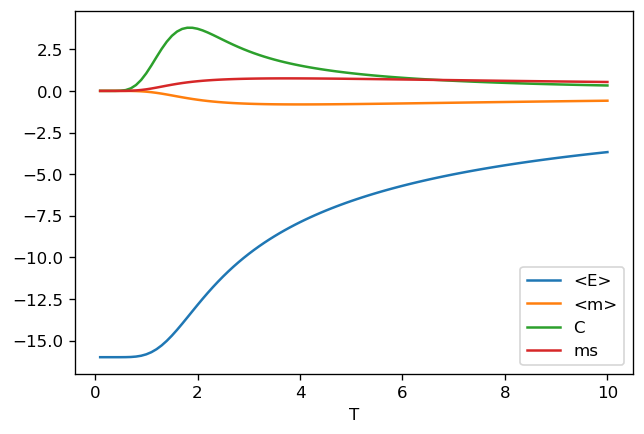

In [39]:
import matplotlib.pyplot as plt
import numpy as np

Tlist=np.linspace(0.1,10,num=100)

Elist = list()
mlist = list()
Clist = list()
mslist = list()

for element in Tlist:
    E, m, C, ms = myH.average(element, 8)
    Elist.append(E) 
    mlist.append(m) 
    Clist.append(C) 
    mslist.append(ms) 
    
plt.figure(num = 0, dpi = 120)
plt.plot(Tlist, Elist,label="<E>")
plt.plot(Tlist, mlist,label="<m>")
plt.plot(Tlist, Clist,label="C")
plt.plot(Tlist, mslist,label="ms")
plt.legend()
plt.xlabel("T")

## Test Function

#Define my hamiltonian values

ham.J = -2   
ham.mu = 1.1 
ham.pbc = True

#Define a new configuration instance for a 2-site lattice

#Compute the average values for Temperature = 1    
    

In [40]:
H = Hamiltonian()
E, m , C, ms = H.average(1,2)

print(" E  = %12.8f" %E)
print(" M  = %12.8f" %m)
print(" HC = %12.8f" %C)
print(" MS = %12.8f" %ms)

 E  =  -3.99104425
 M  =  -0.00298581
 HC =   0.05269599
 MS =   0.00611116


In [226]:
# test result
#  E  =  -3.99104425
#  M  =  -0.00298581
#  HC =   0.05269599
#  MS =   0.00611116